# Introduction:

**K Nearest Neighbor algorithm** falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets.
- As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

## Problem Statement

### Implement a KNN model to classify the animals and predict they are of which animal type. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate.


In [1]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Dataset
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Data Exploration

## Desprictive Analysis

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


As we can see that there is **no missing value and the shape of data is 108 rows and 18 columns**.

In [5]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


There is no duplicate rows in dataset

In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


No outlier in data bcaz the 75% and max value is same 

In [7]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

As we can see in above table there are 7 classes/types of animal.

In [8]:
list(zoo)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

From this we can see that all of the animal characteristics or feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.

We need to keep this in mind going forward while using the data.

Next let's get the distribution of animal data across the types of classes.

# Data Visualization

<AxesSubplot: >

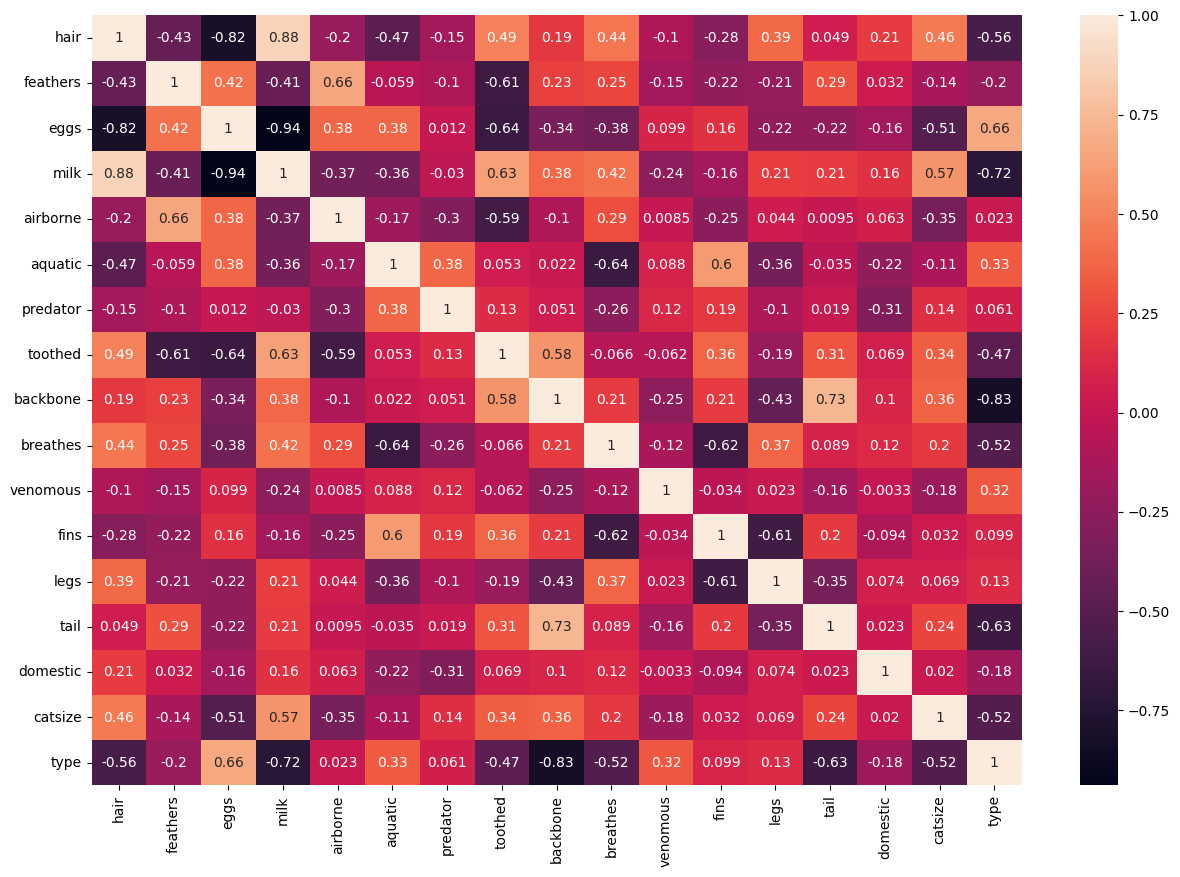

In [9]:
# We see the corr. between variables
plt.figure(figsize=(15,10))
sn.heatmap(zoo.corr(),annot=True)

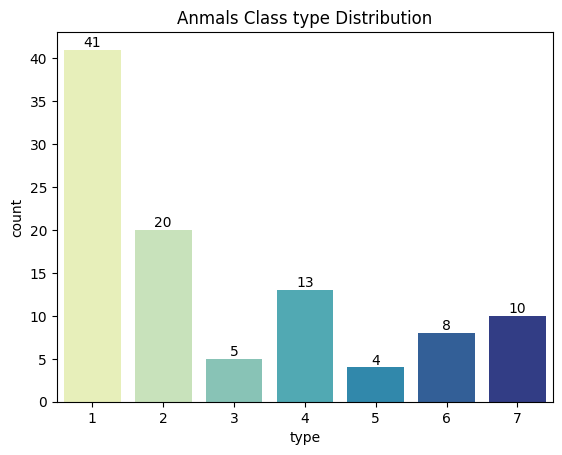

In [10]:
ax=sn.countplot(zoo.type, palette='YlGnBu')
plt.title('Anmals Class type Distribution')

for i in ax.containers:
    ax.bar_label(i,)

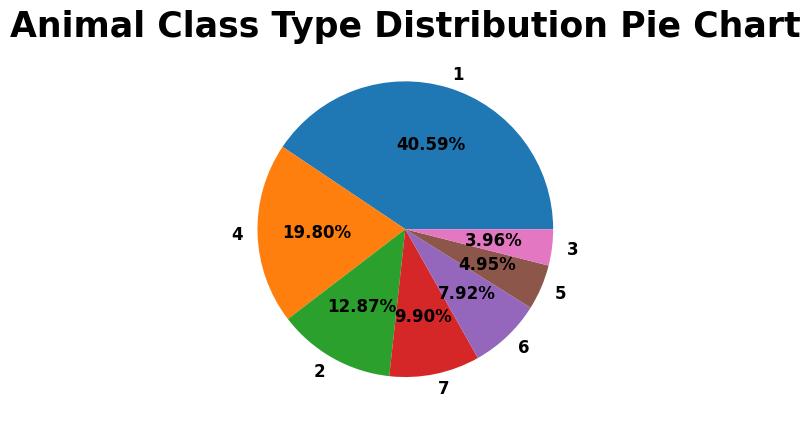

In [11]:
plt.pie(zoo.type.value_counts(),
       labels=zoo.type.unique(),
       autopct='%.2f%%',
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})

plt.title("Animal Class Type Distribution Pie Chart", fontsize = 25, fontweight = 'bold')
plt.show()

1=Mammal ,2=bird, 3=reptile,4=fish,5=Amphibian,6=Bug,7=Invertebrate
In this , 40%+ are mammals

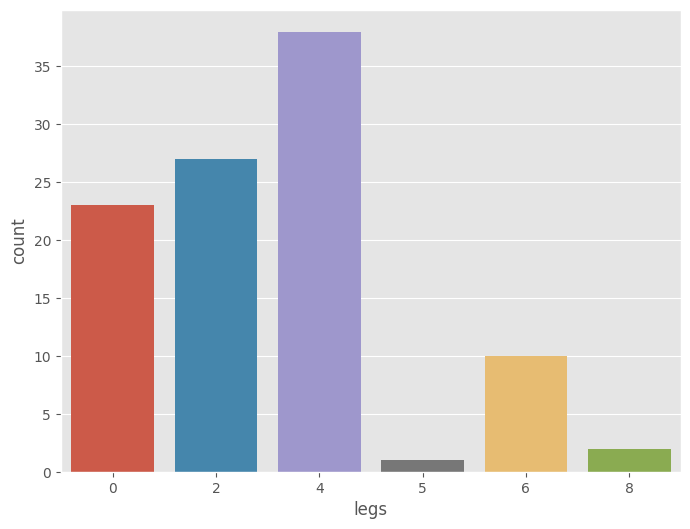

In [12]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(zoo["legs"]);

- Most of the animals have 4 legs
- Least number of animals have 5 legs

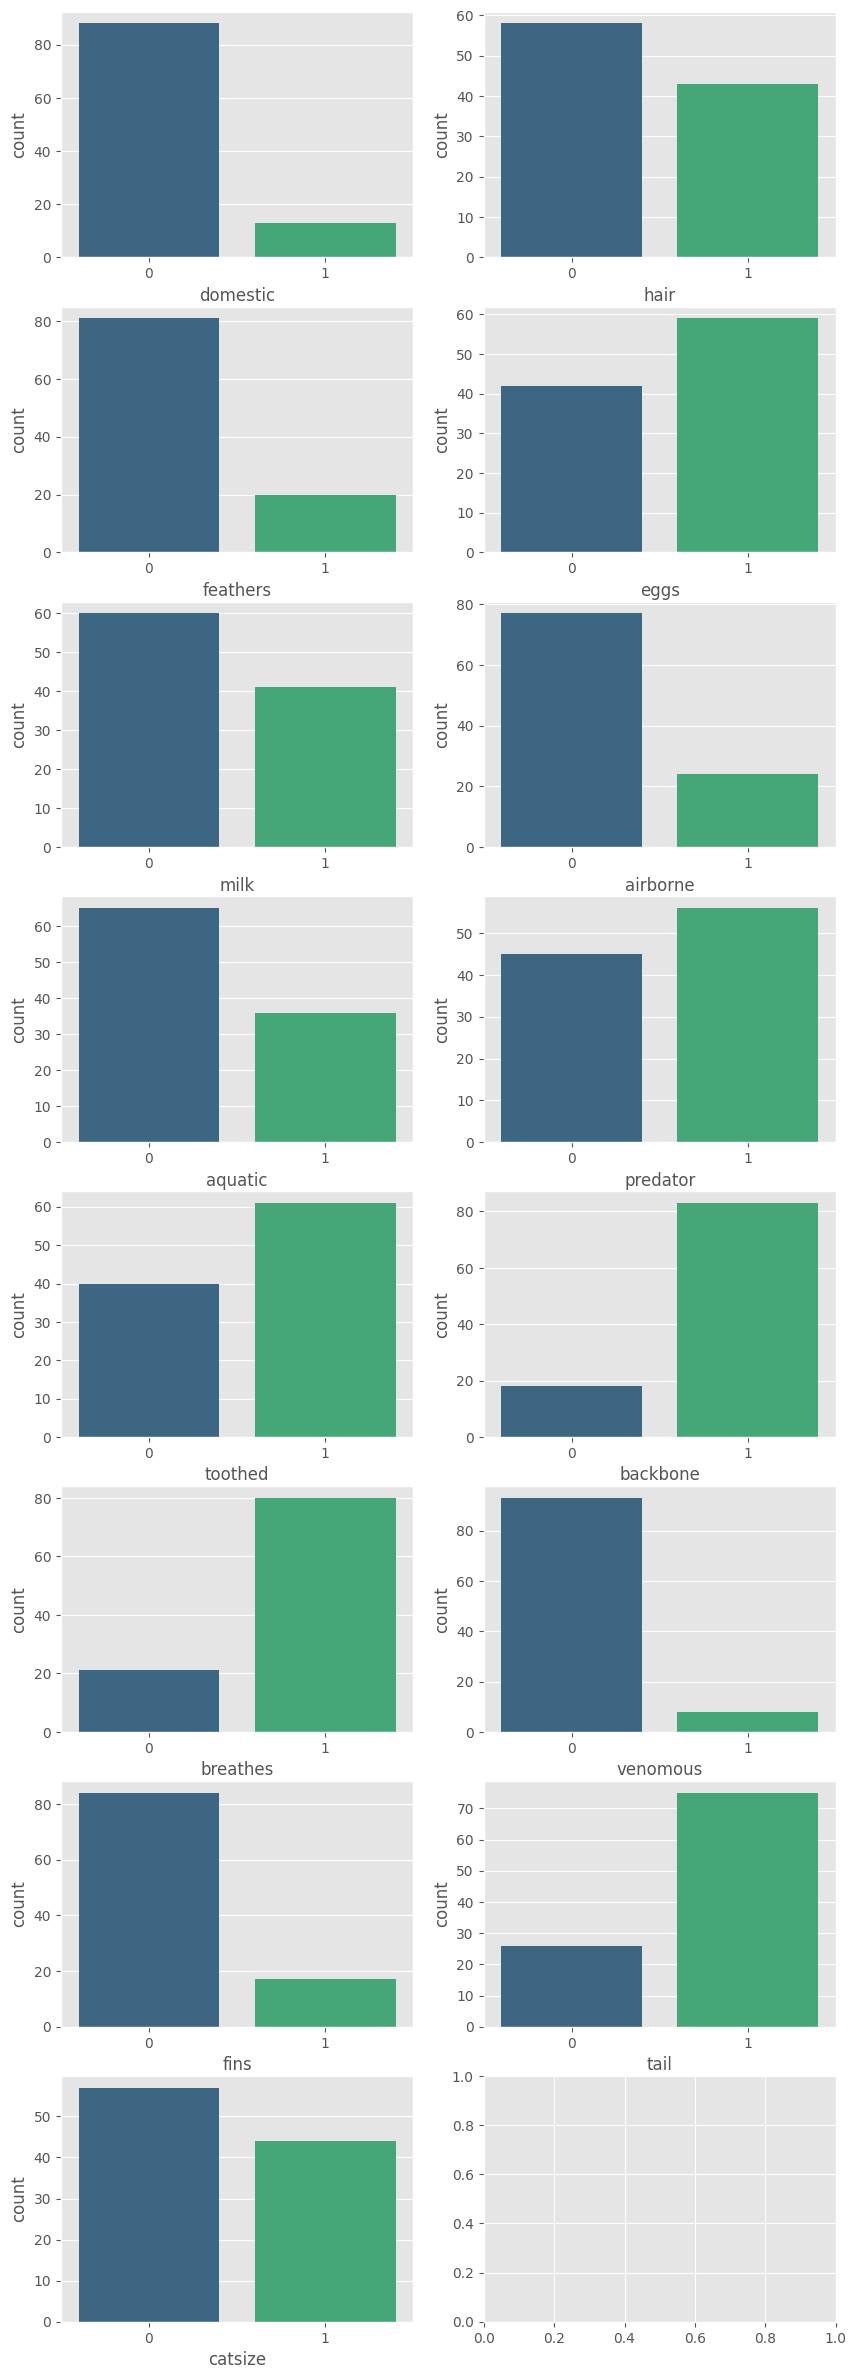

In [13]:
plt.style.use("ggplot")
fig, ax =plt.subplots(8,2, figsize=(10,30)) 

sn.countplot(zoo["domestic"], palette="viridis", ax=ax[0,0])
sn.countplot(zoo["hair"], palette="viridis", ax=ax[0,1])

sn.countplot(zoo["feathers"], palette="viridis", ax=ax[1,0])
sn.countplot(zoo["eggs"], palette="viridis", ax=ax[1,1])

sn.countplot(zoo["milk"], palette="viridis", ax=ax[2,0])
sn.countplot(zoo["airborne"], palette="viridis", ax=ax[2,1])

sn.countplot(zoo["aquatic"], palette="viridis", ax=ax[3,0])
sn.countplot(zoo["predator"], palette="viridis", ax=ax[3,1])

sn.countplot(zoo["toothed"], palette="viridis", ax=ax[4,0])
sn.countplot(zoo["backbone"], palette="viridis", ax=ax[4,1])

sn.countplot(zoo["breathes"], palette="viridis", ax=ax[5,0])
sn.countplot(zoo["venomous"], palette="viridis", ax=ax[5,1])

sn.countplot(zoo["fins"], palette="viridis", ax=ax[6,0])
sn.countplot(zoo["tail"], palette="viridis", ax=ax[6,1])

sn.countplot(zoo["catsize"], palette="viridis", ax=ax[7,0]);



# Data Preprocessing

In [14]:
data=zoo.copy()
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
data.drop(['animal name'],axis=1,inplace=True)

In [16]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Test Train Split and Cross Validation methods

In [17]:
x=data.drop('type',axis=1)
y=data[['type']]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)


In [20]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


### How to choose the value for K?
K is a crucial parameter in the KNN algorithm. Some suggestions for choosing K Value are:

**Using error curves:** 
- It shows error curves for different values of K for training and test data.

### Grid search for choosing the best Value of K


In [21]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [22]:
n_neighbors=np.array([2*i+1 for i in range(1,20)])
param_grid=dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [23]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
grid.fit(x,y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [24]:
grid.best_score_

0.95

In [25]:
grid.best_params_

{'n_neighbors': 3}

**It is recommended to always select an odd value of K** ~ When the value of K is set to even, a situation may arise in which the elements from both groups are equal. In the diagram below, elements from both groups are equal in the internal circle (k == 4).

## Visualizing the CV results

In [27]:
k_range=np.array([2*i+1 for i in range(1,20)])
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10)
    k_scores.append(scores.mean())

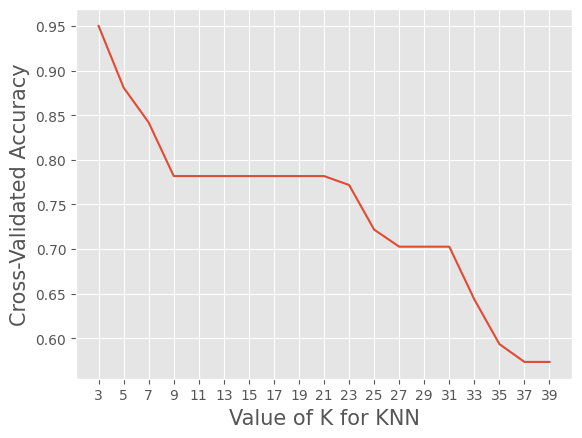

In [28]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',fontsize=15)
plt.ylabel('Cross-Validated Accuracy',fontsize=15)
plt.xticks(k_range)
plt.show()

In [29]:
pd.DataFrame(k_scores).sort_values(0,ascending=False)


,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


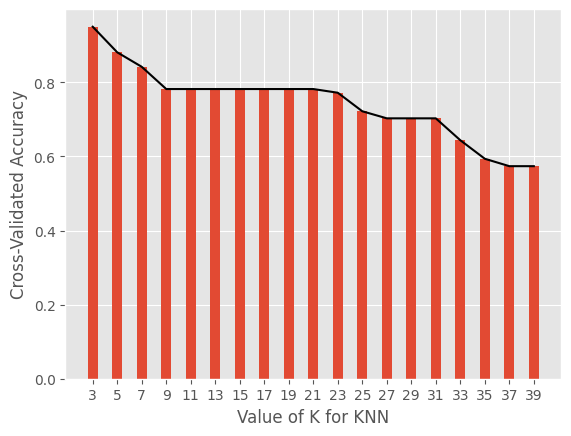

<Figure size 1200x800 with 0 Axes>

In [31]:
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='black')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

#### We can either take K=3 or 9.

Text(0.5, 1.0, 'Error rate vs K-Value')

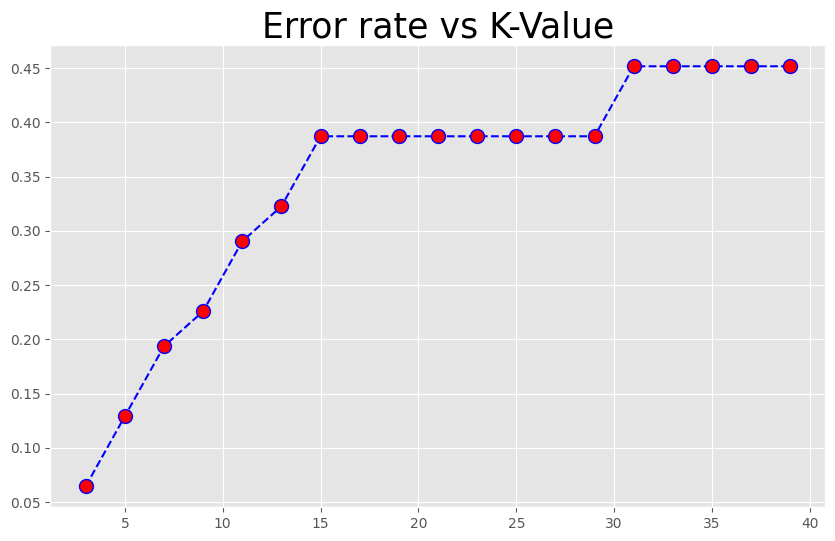

In [41]:
error_rate=[]

k_range=[i for i in range(3,40,2)]

for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    pred_i=pred_i.reshape(31,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot([i for i in range(3,40, 2)],error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-Value',fontsize=25)

    



Here we can see that that after **K>3** the error rate just tends to hover around 0-0.5 Let's retrain the model with that and check the classification report.

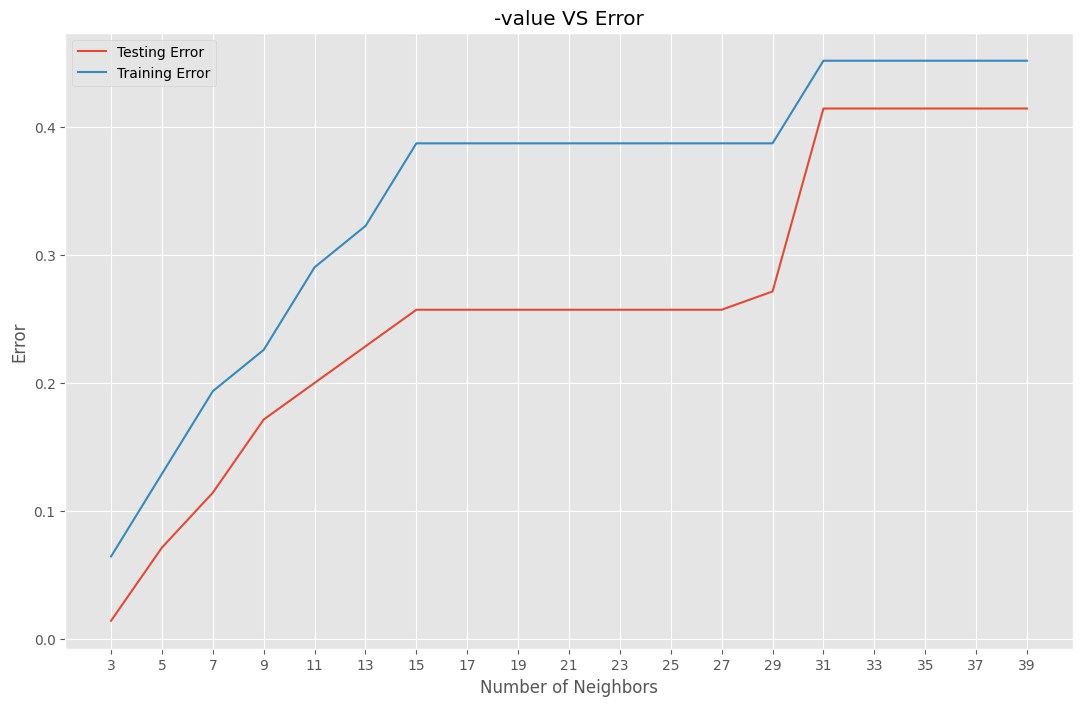

In [42]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))

# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

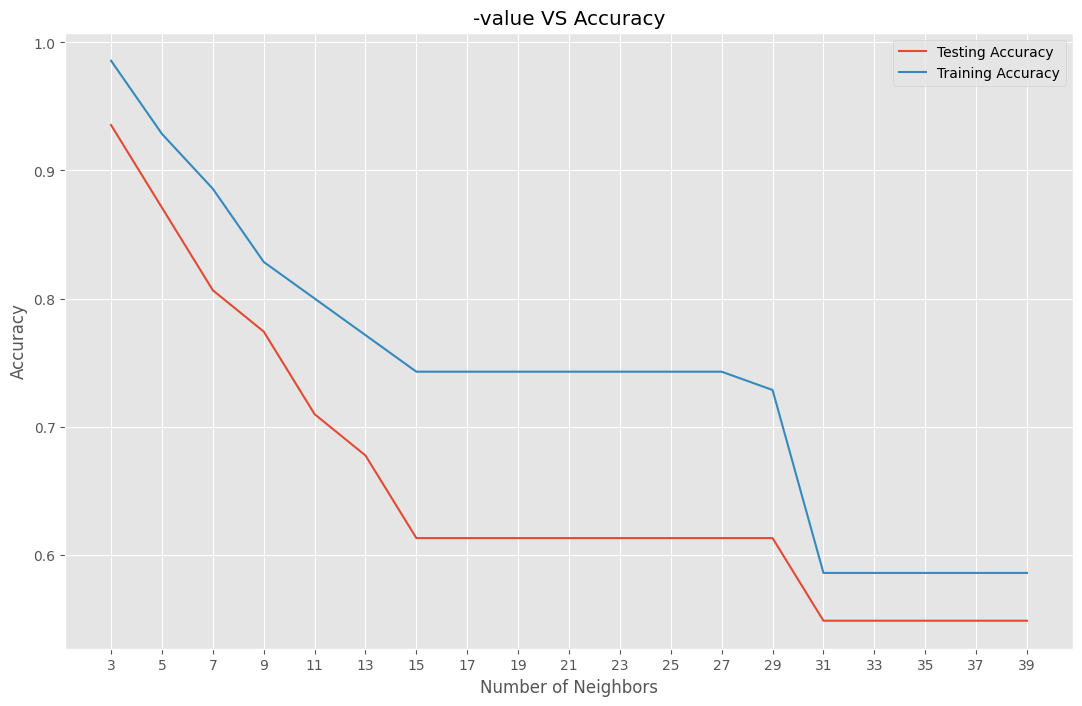

In [43]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()


The best value of **K is 3 or 5** lets check for these value in classifiaction Report.

# Applying KNN
## Predictions and Evalutions:
**1) Confusion Matrix**
**2) Precision Score**
**3) Recall Score**
**4) F1 Score**


In [44]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



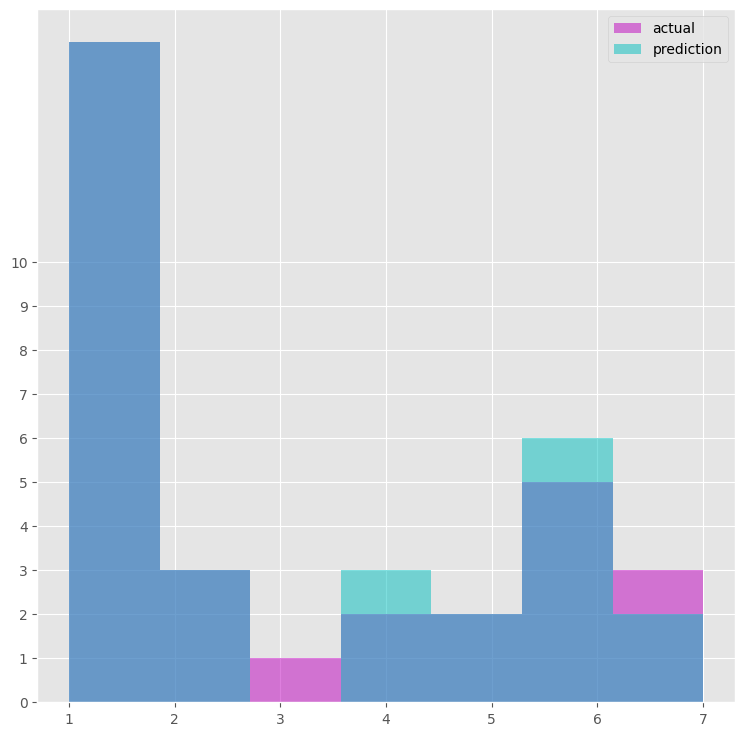

In [45]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()


In [46]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[14  0  0  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



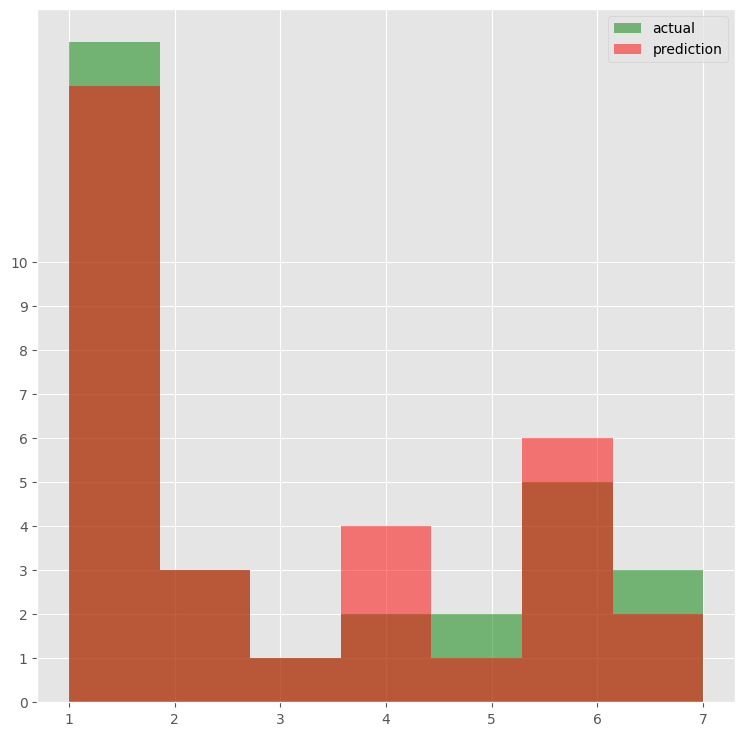

In [64]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'green', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'red', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()